# DIGITAL HOUSE - DATA SCIENCE - GRUPO 6

# Desafío 3 - Modelos de clasificación.

## Aplicación a la detección de fraudes con tarjetas de crédito.

Integrantes:

*    Luciana Sande
*    Bianca Somadossi
*    Verónica del Río


---

<a id="indice"></a> 
## **Índice**

- [1. Introducción](#intro)

- [2. Objetivos del trabajo](#objetivos)

- [3.  El problema de la detección del fraude y el uso de Machine Learning para la detección de estos](#problema_fraude)

- [4. Evaluación de modelos de decisión](#evaluacion_modelos)

    - [4.1. Regresión Logística](#modelo_regresion)

    - [4.2. Support-vector machines (SVM)](#modelo_svm)

    - [4.3. Random Forest](#modelo_random_forest)

- [5. Desarrollo](#desarrollo)

    - [5.1. Entorno de implementación](#implementacion)

    - [5.2. Procesamiento de los datos](#procesamiento)
    
        - [5.2.1. Importación del dataset](#dataset)
        
        - [5.2.2. Exploración del dataset](#exploracion)
        
        - [5.2.3. Análisis de datos exploratorio](#analisis_exploratorio)
            
            - [5.2.3.1. Visualizaciones de las variables Time & Amount](#visualizacion_time_amount)
            
            - [5.2.3.2. Correlación entra las variables](#correlacion)
            
    - [5.3. Preparación de los datos](#estandarizacion)

    - [5.4. Estrategias para el manejo de datos desbalanceados](#estrategias)

    - [5.5. Definición de funciones](#funciones)

    - [5.6. Definición de features, target y sets de train & test](#train_test)
    
    - [5.7. Modelos de Clasificación](#modelos_clf)

        - [5.7.1. Regresión logística sin aplicar estrategias para el manejo de desbalanceo](#rl)

        - [5.7.2. Regresión logística aplicando técnica de penalización para compensar desequilibrio](#rl_penalizacion)

        - [5.7.3. NearMiss. Regresión logística aplicando la técnica de subsampling en la clase mayoritaria](#near_miss)
    
        - [5.7.4. RandomOverSampler. Regresión logística aplicando la técnica de oversampling en la clase minoritaria](#oversampler)

        - [5.7.5. SMOTETomek. Regresión logística combinando resampling con Smote-Tomek](#smotetomek)
        
        - [5.7.6. BalancedBaggingClassifier. Regresión logística con ensamble de modelos con balanceo](#bbc)        
        
    - [5.8. Resultados de la aplicación de las estrategias para clases desbalanceadas](#resultados_estrategias)
        
    - [ 5.9. Support-vector machines, SVM](#svm)
    
    - [5.10. Ranfom Forest](#random)
    
    - [5.11. Naive Bayes](#naive_bayes)

- [6. Resultados finales](#fin)

- [7. Conclusiones](#conclusiones)



<p style='text-align: justify;'>A partir del uso de las tarjetas de crédito se ha producido un crecimiento comercial global de las economías tanto en países emergentes como en los desarrollados. El crecimiento exponencial de los sistemas de transferencia de dinero en línea ha contribuido en la expansión del comercio electrónico y a un número mayor de consumidores de bienes y servicios desde y hacia cualquier lugar del mundo. </p>

<p style='text-align: justify;'>A su vez, durante la pandemia del COVID-19 se ha producido un fuerte incremento del fraude en el ámbito de los pagos − en forma de phishing, vishing, spoofing, robo de la identidad, fraude con tarjeta, contracargos y apropiación de cuentas −, ya que el confinamiento ha propiciado, por un lado, un cambio hacia las transacciones digitales y, por otro, una reducción de diversas medidas de seguridad, como el incremento de los límites en los pagos sin contacto. </p>

<p style='text-align: justify;'>No obstante, el fraude en los pagos ya era un problema mucho antes de la pandemia tal como surge del informe ***Fraud in cash and electronic payments: taxonomy, estimation and projections*** de Santiago Carbó Valverde y Francisco Rodríguez Fernández realizado para la International Security Ligue previo a la pandemia. Dicho informe muestra las alternativas de fraude en los pagos y ofrece una estimación empírica del valor de éste en los pagos con tarjeta.</p>

<p style='text-align: justify;'>En este sentido, el aprendizaje automático se está convirtiendo en una herramienta esencial para las empresas de la industria bancaria, ya que la tecnología se puede utilizar para reducir riesgos, mejorar la seguridad, brindar un servicio rápido y personalizado para atender a los clientes o mejorar la rentabilidad de sus operaciones comerciales.</p>

---
<a id="intro"></a> 
## 1. Introducción.
[Ir a índice](#indice)

---
<a id="objetivos"></a> 
## 2. Objetivos del trabajo.
[Ir a índice](#indice)

<p style='text-align: justify;'>Si bien el objetivo específico del presente trabajo es ayudar a la comprensión del uso de las técnicas de machine learning -en adelante, ML- mediante el uso de modelos de clasificación a fin de análizar casos de fraude con tarjetas bancarias y estimar la eficiencia de modelos de ML para identificar patrones que permitan emitir alertas ante la comisión de éstos, el objetivo general es aprender y aplicar dichas técnicas a datos financieros a través del análisis de sets de datos entregados con información histórica de los clientes.</p>

<p style='text-align: justify;'>A tales efectos, luego de seleccionar los datos a modelar, se procederá a entrenar tres modelos de clasificación sobre dichos datos para posteriormente evaluar la performance de estos y comparar las ventajas y desventajas de cada uno.</p>

<p style='text-align: justify;'>Asimismo, a posteriori, se interpretará la importancia de las features incluidas en la predicción.  </p>


---
<a id="problema_fraude"></a> 
## 3. El problema de la detección del fraude y el uso de ML para su detección.
[Ir a índice](#indice)

A fin de detectar la posible comisión de fraudes es de relevancia analizar los perfiles de los usuarios, ya que dicho análisis permite encontrar anomalías.

En la práctica, la construcción de perfiles de usuario consta de:

1.	Limpieza de datos

2.	Selección y extracción de características que permitan detectar cambios en los comportamientos que indiquen la presencia de fraudes.

3.	Modelamiento, a fin de detectar, mediante un clasificador, patrones de fraude.

4.	Monitoreo y predicción de fraude, a efectos de emitir las alarmas correspondientes.


---
<a id="evaluacion_modelos"></a> 
## 4. Evaluación de los modelos de decisión.
[Ir a índice](#indice)

Los modelos de decisión ajustados en la etapa de construcción de modelos suelen cometer errores de clasificación. La evaluación de los modelos nos indicara el modelo que se equivoque lo menos posible.

### Modelos utilizados:

A los efectos mencionados se utilizarán los siguientes modelos:


#### A.	Regresión logística

#### B.	Support-vector machines, SVM

#### C.	Random Forest

---
<a id="modelo_regresion"></a> 
## 4.1. Modelo I - Regresión Logística.
[Ir a índice](#indice)

<p style='text-align: justify;'>La regresión logística o Logistic Regression es un algoritmo de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 – 0, sí – no, abierto – cerrado, etc.</p>

<p style='text-align: justify;'>Este modelo logístico binario se utiliza para estimar la probabilidad de una respuesta binaria basada en una o más variables predictoras o independientes. Permite decir que la presencia de un factor de riesgo aumenta la probabilidad de un resultado dado un porcentaje específico.</p>

<p style='text-align: justify;'>Como todos los análisis de regresión, la regresión logística es un análisis predictivo. Se usa para describir datos y explicar la relación entre una variable binaria dependiente y una o más variables independientes nominales, ordinales, de intervalo o de nivel de razón.</p>

<p style='text-align: justify;'>La regresión logística requiere tamaños de muestra bastante grandes.</p>

<p style='text-align: justify;'>La razón por la cual la regresión logística es ampliamente utilizada, a pesar de los algoritmos avanzados como redes neuronales profunda, es porque es muy eficiente y no requiere demasiados recursos computacionales que hacen que sea asequibles ejecutar la producción.</p>

### *Características que se deben considerar para este algoritmo*:

**Variable de salida binaria**. Dado que la regresión logística está destinada a problemas de clasificación binarios. Predicará la probabilidad de que una instancia pertenezca a la clase predeterminada, que puede dividirse en una clasificación 0 ó 1.

**Eliminar ruido**. La regresión logística no asume ningún error en la variable de salida (y). Considera la eliminación de los valores atípicos y posiblemente las instancias más clasificadas de sus datos de entrenamiento.

**Distribución gaussiana**. La regresión logística es un algoritmo lineal, con una transformación no lineal en la salida. Las transformaciones de datos de sus variables de entrada que exponen mejor esta relación lineal pueden dar como resultado un modelo más preciso.
**Eliminar entradas correlacionadas**. Al igual que la regresión lineal, el modelo puede sobreajustarse si tiene múltiples entradas altamente correlacionadas.

**No se puede converger**. Es posible que el proceso de estimación de probabilidad esperado aprenda que los coeficientes no convergen, esto puede suceder si hay muchas entradas altamente correlacionadas en sus datos o si los datos son muy escasos.


### Ventajas y desventajas del uso de la Regresión logística:

#### A) Ventajas

•	Eficacia y simplicidad. 

•	No necesita disponer de grandes recursos computacionales, tanto en entrenamiento como en ejecución. 

•	Los resultados son altamente interpretables. 

•	El peso de cada una de las características determina la importancia que tiene en la decisión final. 


#### B) Desventajas

•	No es una herramienta útil para identificar las características más adecuadas. Siendo necesario identificar estas mediante otros métodos

•	No es uno de los algoritmos más potentes que existen. Pudiendo ser superado fácilmente por otros más complejos.

•	No funciona bien en problemas que no son linealmente separables


---
<a id="modelo_svm"></a> 
## 4.2. Modelo II - Support-vector machines (SVM).
[Ir a índice](#indice)

<p style='text-align: justify;'>Una máquina de vectores de soporte es un enfoque, generalmente utilizado para realizar tareas de clasificación, que utiliza un hiperplano de separación en el espacio multidimensional para realizar una tarea determinada. Técnicamente hablando, en un espacio p dimensional, un hiperplano es un subespacio plano con dimensiones p-1. Por ejemplo, en dos dimensiones, un hiperplano es un subespacio unidimensional plano o una línea. En tres dimensiones, un hiperplano es un subespacio bidimensional plano, es decir, un plano.</p>

### Ventajas y desventajas del uso de SMV

#### Ventajas

•	Ofrecen una buena precisión y realizan predicciones más rápidas en comparación con el algoritmo de Naive Bayes. 

•	Utilizan menos memoria porque utilizan un subconjunto de puntos de entrenamiento en la fase de decisión. 

•	Funciona bien con un claro margen de separación y con un espacio dimensional elevado.


#### Desventajas

•	No son adecuadas para grandes conjuntos de datos debido a su alto tiempo de formación.

•	Requiere más tiempo de formación en comparación con otros clasificadores como Naive Bayes.

•	Funciona mal con clases superpuestas y también es sensible al tipo de núcleo utilizado.


---
<a id="modelo_random_forest"></a>
## 4.3. Modelo III - Random Forest.
[Ir a índice](#indice)

La idea que hay detrás de un bosque aleatorio es promediar árboles de decisión múltiples (profundos) que individualmente sufren una elevada varianza para crear un modelo más robusto que tengan un mejor rendimiento de generalización y sea menos susceptible al sobreajuste. Así, el algoritmo del bosque aleatorio se puede resumir en cuatro pasos:

* 1.	Dibuja una muestra Bootstrap aleatoria de tamaño n (elige al azar muestras n del conjunto de entrenamiento con reemplazo).
*  2.	Crea un árbol de decisión a partir de la muestra Bootstrap y, para cada nodo:
    * a.	Selecciona al azar características d sin reemplazo.
    * b.	Divide el nodo utilizando la característica que proporciona la mejor división según la función objetivo.
* 3.	Repite los pasos 1-2 K veces
* 4.	Añade la predicción para cada árbol para asignar la etiqueta de clase por mayoría de votos.

Aunque los bosques aleatorios no ofrecen el mismo nivel de interpretabilidad que los bosques de decisión, poseen la ventaja de que no debemos preocuparnos demasiado por elegir unos buenos valores de hiperparámetro. Normalmente no es necesario podar los bosques puesto que el modelo es bastante robusto ante el ruido de los árboles de decisión individuales.

Mediante el tamaño de la muestra n de la Bootstrap controlamos la compensación entre varianza y sesgo del bosque aleatorio.

Reducir el tamaño de la muestra Bootstrap aumenta la diversidad entre los árboles individuales aumentando la aleatoriedad del bosque y esto puede ayudar al efecto de sobreajuste.

Dado que uno de los problemas que tiene el uso de un árbol de decisión es que, si le damos la profundidad suficiente, el modelo tiende al ***overfitting***, ésta es la razón por la cual optamos por trabajar con bosques aleatorios.

A tales efectos se seguirán los siguientes pasos:

1)	Seleccionamos k features (columnas) de las m totales (siendo k menor a m) y creamos un árbol de decisión con esas k características.

2)	Creamos n árboles variando siempre la cantidad de k features aunque también podríamos variar la cantidad de muestras que pasamos a esos árboles es decir, hacer un *bootstrap sample*.

3) Tomamos cada uno de los n árboles y le pedimos que hagan una misma clasificación. Guardamos el resultado de cada árbol obteniendo n salidas.

4)	Calculamos los votos obtenidos para cada *clase* seleccionada y consideraremos a la más votada como la clasificación final de nuestro “bosque”.


El sobreajuste es un problema común en el ML donde un modelo funciona bien en el entrenamiento pero no generaliza bien con los datos de prueba. Si se da un sobreajuste es porque tiene una alta varianza, causada tal vez por tener demasiados parámetros.

El sobreajuste es un problema común en el ML donde un modelo funciona bien en el entrenamiento pero no generaliza bien con los datos de prueba. Si se da un sobreajuste es porque tiene una alta varianza, causada tal vez por tener demasiados parámetros.

El modelo puede sufrir de subajuste si tiene un sesgo elevado y por lo tanto no es lo suficientemente complejo como para captar correctamente el patrón de los datos de entrenamiento lo que lleva a un bajo rendimiento por los datos no vistos.

### Ventajas y Desventajas del uso de Random Forest

#### Ventajas

•	Funciona bien -aún- sin ajuste de hiperparámetros

•	Funciona bien para problemas de clasificación y también de regresión.

•	Al utilizar múltiples árboles se reduce considerablemente el riesgo de overfiting

•	Es estable con nuevas muestras pues al utilizar cientos de árboles sigue prevaleciendo el promedio de sus votaciones.


#### Desventajas

•	En algunos datos de entrada ***particulares*** random forest también puede caer en *overfitting*.

•	Es mucho más ***costoso*** de crear y ejecutar que ***un sólo árbol” de decisión***.

•	Puede requerir muchísimo tiempo de entrenamiento.

•	Random Forest no funciona bien con datasets pequeños.

•	Es muy difícil poder interpretar todos los árboles creados en el bosque, lo que redunda es la dificultad para explicar a un cliente su comportamiento.


---
<a id="desarrollo"></a> 
# 5. Desarrollo.
[Ir a índice](#indice)

<a id="implementacion"></a>
## 5.1. Entorno de implementación.

In [51]:
# initial setup
# %run "common/0_notebooks_base_setup.py"

In [2]:
#importamos de todas las librerías que vamos a utilizar

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib','inline')

import os
import itertools

#Scale-data
from sklearn.preprocessing import StandardScaler

#Over-sample data
from imblearn.over_sampling import SMOTE

#Clasifiers
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#Cross-validation
# from sklearn.model_selection import cross_val_score

#Split data in test & train
from sklearn.model_selection import train_test_split

#Get metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, confusion_matrix, classification_report, roc_curve

# from sklearn.feature_selection import SelectKBest

from collections import Counter

%matplotlib inline


In [53]:
pd.options.display.float_format='{:,.2f}'.format

---
<a id="procesamiento"></a> 
## 5.2. Procesamiento de los datos.
[Ir a índice](#indice)

<a id="dataset"></a> 
### 5.2.1 Importación del dataset.

Utilizaremos un conjunto de datos publicado en Kaggle, relacionado con la detección de fraudes con tarjetas de crédito.

Para acceder al dataset original haga click <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud" target="_blank">aquí</a>

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos, durante el transcurso de dos días.

En total, contempla 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transacciones.

Cuenta solo con variables de entrada numéricas, que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no es posible proporcionar las características originales ni más información general sobre los datos. 

Las características o features V1, V2, … V28 son los principales componentes obtenidos con PCA. Las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. 

La característica 'Tiempo' (Time) representa los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. 

La función 'Cantidad' (Amount) representa el monto de la transacción.

La feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

En estadística, el análisis de componentes principales (en español ACP; en inglés, PCA) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Técnicamente, el PCA busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. Esta convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal, llamadas componentes principales.

El PCA se emplea sobre todo en análisis exploratorio de datos y para construir modelos predictivos. El PCA comporta el cálculo de la descomposición en autovalores de la matriz de covarianza, normalmente tras centrar los datos en la media de cada atributo.

In [4]:
#Importaremos el dataset original de Kaggle, creando un Dataframe.

data_location = "Data/creditcard.csv"

df = pd.read_csv(data_location, sep=",", encoding="UTF-8")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe3 in position 14: invalid continuation byte

---
<a id="exploracion"></a> 
### 5.2.2. Exploración del dataset.

Exploramos el data set, obteniendo un primer acercamiento de sus métricas:

In [55]:
print('El dataset contiene {} filas o registros y {} columnas o features.'.format(df.shape[0], df.shape[1]))

El dataset contiene 284807 filas o registros y 31 columnas o features.


Es decir que contamos con un total de 284.807 transacciones. A continuación, mostramos los 5 primeros registros del dataset:

In [56]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


Presentamos un resumen conciso de la estructura del dataset, incluyendo el tipo de datos de cada columna, cantidad de valores no nulos -que como veremos, no existen- y el uso de memoria:

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Estas son las columnas que lo componen:

In [58]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

El dataset presenta 28 columnas anónimas, etiquetadas de V1 a V28. Las tres características restantes son el tiempo ('time') y el monto de la transacción ('Amount'), así como si esa transacción fue fraudulenta o no ('Class'), a través de una variable binaria o dummy, correspondiendo el 0 con una “transacción Normal” y el 1 a “Hubo Fraude”.

---
<a id="analisis_exploratorio"></a> 
### 5.2.3. Análisis de datos exploratorio.
[Ir a índice](#indice)

Vamos a centrarnos en las variables que no son anónimas: tiempo, cantidad y clase.

Generamos estadísticas descriptivas de éstas, como aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo valores nulos.

In [59]:
df[['Time','Amount']].describe()

,Time,Amount
count,"284,807.00","284,807.00"
mean,"94,813.86",88.35
std,"47,488.15",250.12
min,0.00,0.00
25%,"54,201.50",5.60
50%,"84,692.00",22.00
75%,"139,320.50",77.16
max,"172,792.00","25,691.16"


El valor medio de las transacciones es $$ 88.35, siendo que la la mayor transacción asciende a $ 25.691,16. En función de ello, podríamos inferir que la gran mayoría de las transacciones consideradas son de montos bajos.

Respecto de la columna "Class", como ya hemos mencionado, la misma es una variable dummy, en la cual el valor '1' representa casos detectados como fraudulentos y el '0' aquellos que no lo son. Nuevamente, los casos positivos son una mínima parte (492) en relación al total de casos considerados (284.807). Lo que significa que nuestro set de datos está muy desequilibrado y tendremos muy pocas muestras etiquetadas como "fraude".

In [60]:
tipo_transacciones = df.Class.value_counts()
print(tipo_transacciones)

0    284315
1       492
Name: Class, dtype: int64


In [61]:
#Calculamos total de casos de cada clase y su porcentaje respecto del total de muestras.
no_fraudulentas = tipo_transacciones[0]
fraudulentas = tipo_transacciones[1]
total = no_fraudulentas + fraudulentas
porc_no_fraudulentas = (no_fraudulentas/(total))*100
porc_fraudulentas = (fraudulentas/(total))*100
print('Hubo un total de {} transacciones no fraudulentas ({:.3f}%) y {} transacciones fraudulentas ({:.3f}%).'.format(no_fraudulentas, porc_no_fraudulentas, fraudulentas, porc_fraudulentas))

Hubo un total de 284315 transacciones no fraudulentas (99.827%) y 492 transacciones fraudulentas (0.173%).


Text(0, 0.5, 'Número de observaciones')

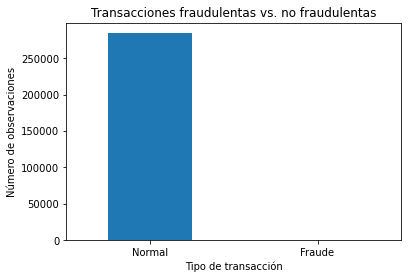

In [62]:
#Graficamos los resultados obtenidos en la celda anterior.
LABELS = ["Normal","Fraude"]
count_classes = df.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Transacciones fraudulentas vs. no fraudulentas")
plt.xlabel("Tipo de transacción")
plt.ylabel("Número de observaciones")

---
<a id="visualizacion_time_amount"></a> 
#### 5.2.3.1. Visualizaciones de las variables Time & Amount.
[Ir a índice](#indice)


C:\Users\Lu\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribución del Tiempo de las transacciones'}, xlabel='Time', ylabel='Density'>

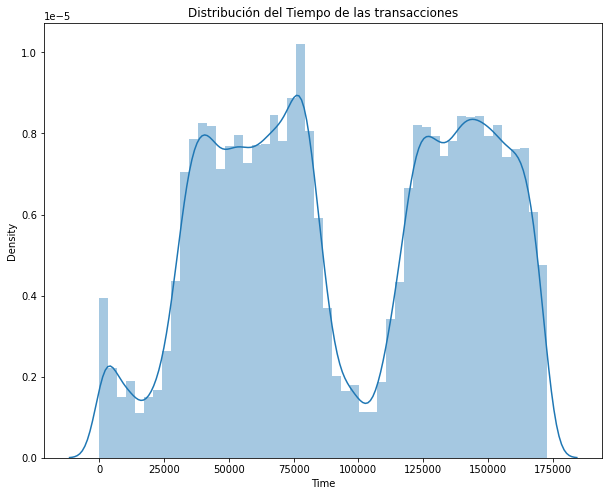

In [63]:
#Visualización del tiempo
plt.figure(figsize=(10,8))
plt.title('Distribución del Tiempo de las transacciones')
sns.distplot(df.Time)

El conjunto de datos incluye todas las transacciones registradas en el transcurso de dos días, en términos de segundos. La distribución es bimodal. Por lo que vemos, poco después del primer día, hubo una caída significativa en el volumen de transacciones. Si bien no se proporciona la hora de la primera transacción, sería razonable suponer que la caída en el volumen ocurrió durante la noche.

C:\Users\Lu\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribución del valor monetario de las transacciones'}, xlabel='Amount', ylabel='Density'>

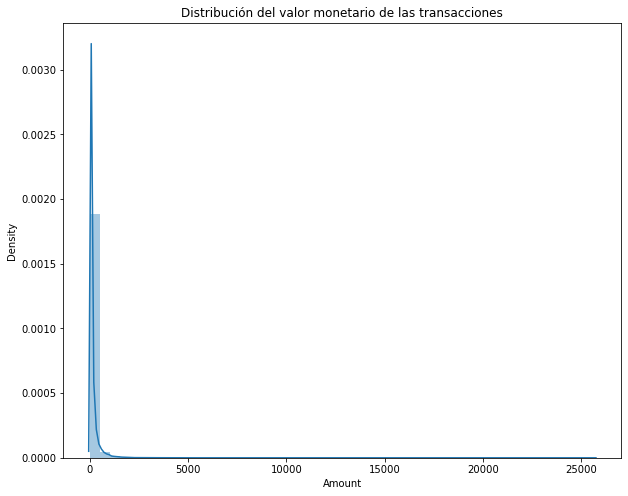

In [64]:
plt.figure(figsize=(10,8))
plt.title('Distribución del valor monetario de las transacciones')
sns.distplot(df.Amount)

---
<a id="correlacion"></a> 
#### 5.2.3.2. Correlación entra las variables.
[Ir a índice](#indice)

A continuación, vamos a verificar si existe correlación significativa entre nuestros predictores y graficarlo con un heatmap.

In [65]:
#Usaremos la función de Pandas dataframe.corr() para encontrar la correlación por pares de todas las columnas de nuestro dataset. 
#Cualquier valor nulo se excluye automáticamente.

correlacion = df.corr()
correlacion

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'Time'),
  Text(1.5, 0, 'V1'),
  Text(2.5, 0, 'V2'),
  Text(3.5, 0, 'V3'),
  Text(4.5, 0, 'V4'),
  Text(5.5, 0, 'V5'),
  Text(6.5, 0, 'V6'),
  Text(7.5, 0, 'V7'),
  Text(8.5, 0, 'V8'),
  Text(9.5, 0, 'V9'),
  Text(10.5, 0, 'V10'),
  Text(11.5, 0, 'V11'),
  Text(12.5, 0, 'V12'),
  Text(13.5, 0, 'V13'),
  Text(14.5, 0, 'V14'),
  Text(15.5, 0, 'V15'),
  Text(16.5, 0, 'V16'),
  Text(17.5, 0, 'V17'),
  Text(18.5, 0, 'V18'),
  Text(19.5, 0, 'V19'),
  Text(20.5, 0, 'V20'),
  Text(21.5, 0, 'V21'),
  Text(22.5, 0, 'V22'),
  Text(23.5, 0, 'V23'),
  Text(24.5, 0, 'V24'),
  Text(25.5, 0, 'V25'),
  Text(26.5, 0, 'V26'),
  Text(27.5, 0, 'V27'),
  Text(28.5, 0, 'V28'),
  Text(29.5, 0, 'Amount'),
  Text(30.5, 0, 'Class')])

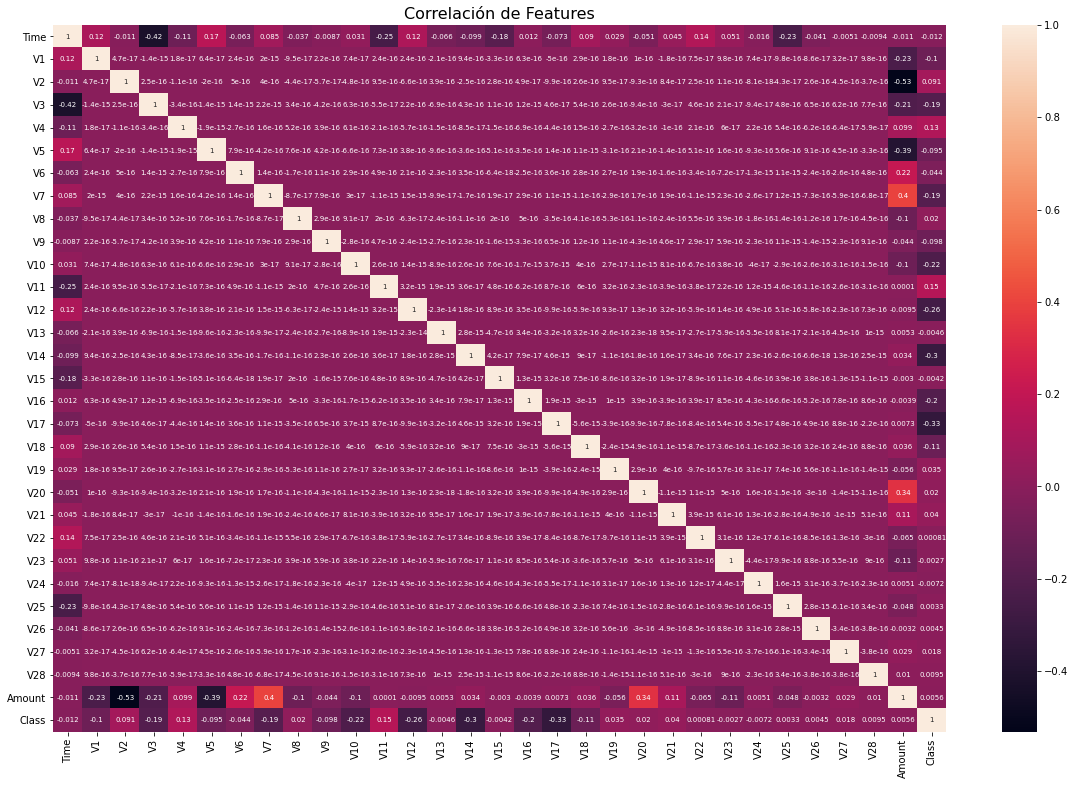

In [66]:
plt.figure(figsize=(20,13))
sns.heatmap(correlacion, annot=True, annot_kws={"size": 7})
plt.title('Correlación de Features', fontsize=16)
plt.yticks(fontsize=10, rotation=0)
plt.xticks(fontsize=10)

Como podemos ver, algunos de nuestros predictores parecen estar correlacionados con la variable tipo de transacción ('Class'). No obstante, parece haber relativamente pocas correlaciones significativas para un número tan grande de variables.

---
<a id="estandarizacion"></a> 
### 5.3. Preparación de los datos. Estandarización.
[Ir a índice](#indice)

Con el fin de evitar problemas a futuro, vamos a estandarizar las columnas de tiempo y cantidad, que, tal como se aclara en Kaggle, son las únicas features que no fueron transformadas.

Para esto, vamos a hacer uso de la clase sklearn.preprocessing.StandardScaler, la cual estandariza los datos eliminando la media y escalandolos de forma que su varianza sea igual a 1.

In [67]:
#Instancio una clase de StandardScaler.
scaler = StandardScaler()

In [68]:
#Estandarizamos la columna de cantidad.
scaled_amount = scaler.fit_transform(df[['Amount']])
flat_list = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list)

In [69]:
#Estandarizamos la columna de tiempo.
scaled_time = scaler.fit_transform(df[['Time']])
flat_list = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list)

In [70]:
#Concatenamos las nuevas columnas al dataset.
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0,0.24,-2.00
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0,-0.34,-2.00
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0,1.16,-2.00
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0,0.14,-2.00
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0,-0.07,-2.00


In [71]:
#Droppeamos las columnas de tiempo y cantidad originales.
df.drop(['Amount', 'Time'], axis=1, inplace=True)

---
<a id="estrategias"></a> 
### 5.4. Estrategias para el manejo de datos desbalanceados.
[Ir a índice](#indice)

Atento a que nuestro objetivo es crear un conjunto de datos de entrenamiento que permita que nuestros algoritmos recojan las características específicas que hacen que una transacción sea más o menos probable que sea fraudulenta, el uso del conjunto de datos original no resultaría eficiente debido a que se encuentra desequilibrado: dado que más del 99% de nuestras transacciones no son fraudulentas, un algoritmo que siempre predice que la transacción no es fraudulenta lograría una precisión superior a 99 %. Sin embargo, eso es lo contrario de lo que queremos. 

No queremos una precisión del 99% que se logra al nunca etiquetar una transacción como fraudulenta, queremos detectar transacciones fraudulentas y etiquetarlas como tales.

El funcionamiento de la regresión logística, al igual que la regresión lineal, es eficiente cuando se utilizan atributos relacionados con la de salida, eliminando aquellos que no lo están. 

Asimismo, es importante eliminar las características que muestran una gran multicolinealidad entre sí. Por lo que la selección de las características previa al entrenamiento del modelo es clave.

Existen diversas estrategias para trabajar con sets de datos desbalanceados:
* **Ajuste de parámetros del modelo (penalización)**: consiste en ajustar parametros ó metricas del propio algoritmo para intentar equilibrar a la clase minoritaria penalizando a la clase mayoritaria durante el entrenamiento. Ejemplos son ajuste de peso en árboles, también en logisticregression tenemos el parámetro class_weight= “balanced” que utilizaremos en este ejemplo. No todos los algoritmos tienen estas posibilidades. 

* **Modificar el dataset**: podemos eliminar muestras de la clase mayoritaria A fin de reducirlo e intentar equilibrar la situación; sin embargo, corremos el riesgo de prescindir de muestras importantes, que brindan información y por lo tanto empeorar el modelo. Entonces para seleccionar qué muestras eliminar, deberíamos seguir algún criterio. También podríamos agregar nuevas filas con los mismos valores de las clases minoritarias, por ejemplo cuadriplicar nuestras 492 filas de transacciones fraudulentas; no obstante, llevar a cabo ésta estrategia puede llevar al modelo a caer en overfitting.

* **Utilizar muestras artificiales**: podemos intentar crear muestras sintéticas (no idénticas) utilizando diversos algoritmos que intentan seguir la tendencia del grupo minoritario. Lo peligroso de crear muestras sintéticas es que podemos alterar la distribución “natural” de esa clase y confundir al modelo en su clasificación.

* **Balanced Ensemble Methods**: ensamble de métodos, es decir, se entrenan diversos modelos y entre todos se obtiene el resultado final (por ejemplo “votando”) pero se asegura de tomar muestras de entrenamiento equilibradas.

Aplicaremos las distintas técnicas para seleccionar la que mejor performa para el dataset utilizado y el objetivo perseguido. Tomaremos como base el modelo de Regresión Logística, aplicándolo en primer lugar al dataset tal cual se obtuvo y luego se aplicarán las estrategias mencionadas.

---
<a id="funciones"></a> 
### 5.5. Definición de funciones.
[Ir a índice](#indice)

Primero vamos a definir las funciones que utilizaremos para implementar los distintos modelos, calcular sus scores y graficas las matrices de confusión.

In [72]:
resume = {}
results = pd.DataFrame()

In [73]:
def predict_estimator(clf, X_test, X_train, y_train):
    '''Calcula predictores para el clasificador que se elija, pasándoselo como parámetro clf'''
    
    model = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)
    train_pred = clf.predict(X_train)
    
    return model, y_pred, y_pred_prob, train_pred


In [74]:
def run_lr_model(X_train, X_test, y_train, y_test):
    '''Crea un modelo de Regresión logística cada vez que se la ejecuta'''
    
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base


def roc_auc_curve(y_test, pred_prob_y):
    '''Grafica la Curva Roc'''
    
    fpr_log,tpr_log,thr_log = roc_curve(y_test, pred_prob_y[:,1])
    df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
    plt.axis([0, 1.01, 0, 1.01])
    plt.xlabel('1 - Specificty')
    plt.ylabel('TPR / Sensitivity')
    plt.title('ROC Curve')
    plt.plot(df['fpr'],df['tpr'])
    plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
    plt.show()
    

def show_results(clf, model, X_test, y_test):
    '''Calcula scores del modelo y Grafica la matriz de confusión'''
    
    pred_y = model.predict(X_test)
    pred_prob_y = model.predict_proba(X_test)
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase Real')
    plt.xlabel('Predicción')
    plt.show()
    
    recall_s = recall_score(y_test, pred_y)
    pecision_s = precision_score(y_test, pred_y)
    f1_s = f1_score(y_test, pred_y)
    roc_value = roc_auc_score(y_test, pred_prob_y[:,1])
    accuracy_s = accuracy_score(y_test, pred_y).round(2)
    
    resume = {'Clasificador': clf,
          'Recall': recall_s,
          'Precision': pecision_s,
          'f1 Score': f1_s,
          'Accuracy Score': accuracy_s,
          'ROC AUC': roc_value}    
    
    print (classification_report(y_test, pred_y))
    
    print("\nRecall: {}".format(recall_s))
    
    print("\nROC AUC: {}".format(roc_value))

    roc_auc_curve(y_test, pred_prob_y)
    
    return resume 

In [75]:
def resume(results,resume):
    '''Appendea en el df results los resultados de cada clasificador para facilitar la comparación'''
    results = results.append(resume,ignore_index=True)
    results = results.sort_values(['ROC AUC'], ascending=False)
    return results

---
<a id="train_test"></a> 
### 5.6. Definición de features, target y sets de train & test.
[Ir a índice](#indice)

In [76]:
#Preparamos los datos en una matriz de features 'X' y un array target 'y'.

X = df.drop('Class', axis=1).values
y = df['Class'].values

Creamos los conjuntos de entrenamiento y test, estableciendo el valor del parámetro stratify para que los datos se dividan de forma estratificada según las etiquetas de Class. Esto construye conjuntos de entrenamiento y test que mantienen la misma proporción de registros en cada categoría que en el dataset original.

In [77]:
#Separo en sets de entrenamiento y test.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25) 

---
<a id="modelos_clf"></a> 
### 5.7. Modelos de Clasificación.
[Ir a índice](#indice)

---
<a id="rl"></a> 
#### 5.7.1.	Regresión logística sin aplicar estrategias para el manejo de desbalanceo.
[Ir a índice](#indice)

In [78]:
model = run_lr_model(X_train, X_test, y_train, y_test)

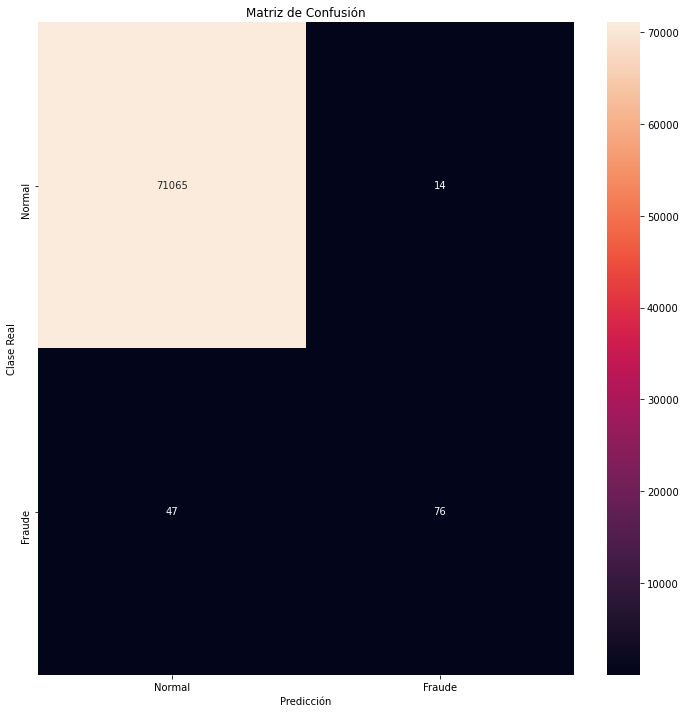

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.62      0.71       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202


Recall: 0.6178861788617886

ROC AUC: 0.9578810568842614


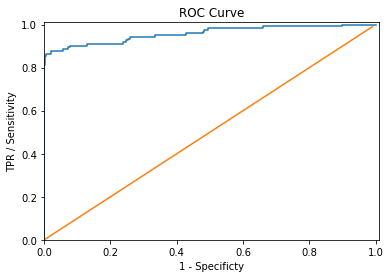

In [79]:
resume_lr = show_results('Logistic Regression', model, X_test, y_test)

In [80]:
results = resume(results,resume_lr)

Como vemos en la matriz de confusión, en la clase 2 (casos fraudulentos) vemos 47 fallos y 76 aciertos dando un recall de 0.62 y es el valor que queremos mejorar. También es interesante notar que en la columna de f1-score obtenemos muy buenos resultados; no obstante, están reflejando una realidad parcial.

---
<a id="rl_penalizacion"></a> 
#### 5.7.2. Regresión logística aplicando técnica de penalización para compensar desequilibrio.
[Ir a índice](#indice)

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos class_weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento.

In [81]:
clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
model = clf.fit(X_train, y_train)

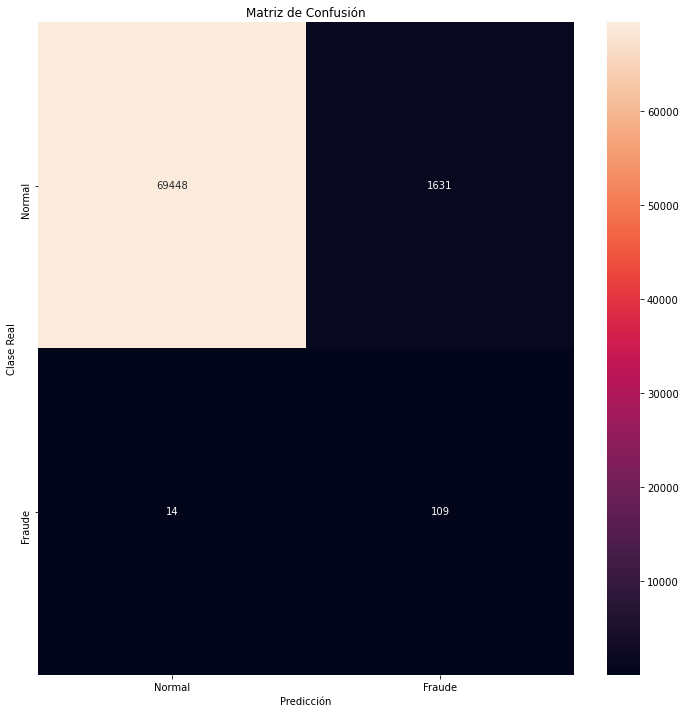

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202


Recall: 0.8861788617886179

ROC AUC: 0.972643973263689


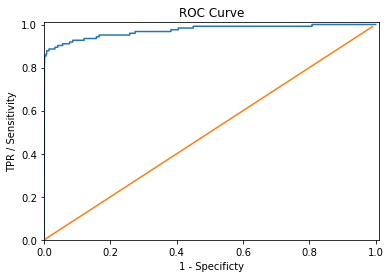

In [82]:
resume_penalized_lr = show_results('Penalized Linear Regression', model, X_test, y_test)

Vemos una sustancial mejora, en este caso se han acertado 109 muestras (calificadas correctamente como fraudes) y fallado en 14, dando un recall de 0.89. Por otra parte, en la columna de f1-score parecería que hubieran “empeorado” los resultados cuando realmente estamos mejorando la detección de casos fraudulentos. Es cierto que aumentan los Falsos Positivos y se han etiquetado 1631 muestras como Fraudulentas cuando no lo eran. Pero retomando nuevamente el objetivo del trabajo y para qué usuario/cliente estaría enfocado, entendemos que resulta más importante detectar los verdaderos casos de fraude.

In [83]:
results = resume(results,resume_penalized_lr)

---
<a id="nearmiss"></a> 
#### 5.7.3. NearMiss. Regresión logística aplicando la técnica de subsampling en la clase mayoritaria.
[Ir a índice](#indice)

Utilizaremos un algoritmo para reducir la clase mayoritaria (hace similar al k-nearest neighbor para ir seleccionando cuáles eliminar) y con esas muestras entrenamos el modelo. La clase NearMiss de la librería imbalanced learn (imblearn).

Distribución de los tipos de transacción antes del resampling Counter({0: 213236, 1: 369})
Distribution de los tipos de transacción luego del resampling Counter({0: 369, 1: 369})


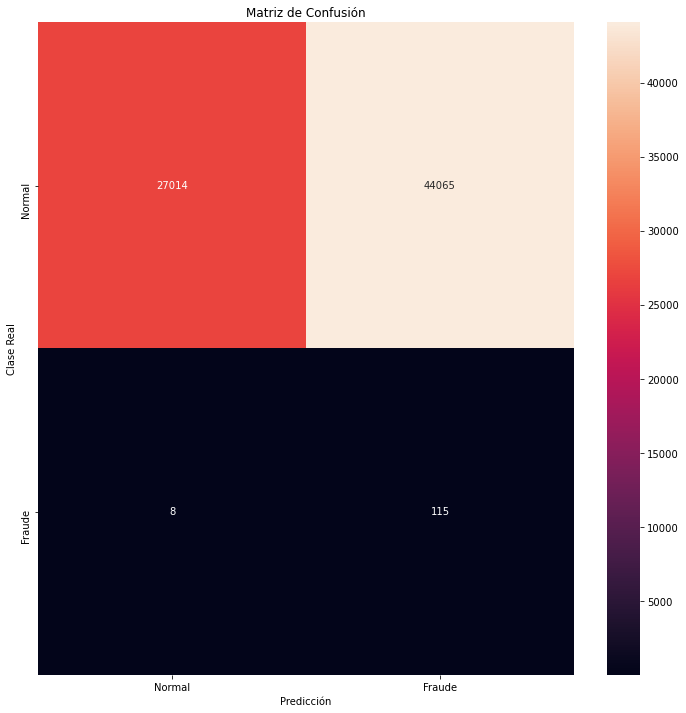

              precision    recall  f1-score   support

           0       1.00      0.38      0.55     71079
           1       0.00      0.93      0.01       123

    accuracy                           0.38     71202
   macro avg       0.50      0.66      0.28     71202
weighted avg       1.00      0.38      0.55     71202


Recall: 0.9349593495934959

ROC AUC: 0.7966512012226863


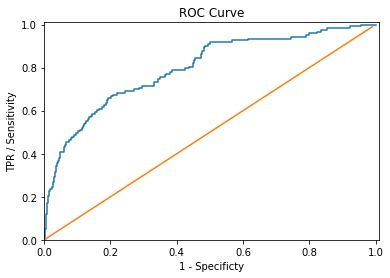

In [84]:
subsampling = NearMiss(n_neighbors=3, version=2)
X_train_res, y_train_res = subsampling.fit_resample(X_train, y_train)
 
print ("Distribución de los tipos de transacción antes del resampling {}".format(Counter(y_train)))
print ("Distribution de los tipos de transacción luego del resampling {}".format(Counter(y_train_res)))
 
model = run_lr_model(X_train_res, X_test, y_train_res, y_test)
resume_nm = show_results('NearMiss', model, X_test, y_test)


También vemos que obtenemos muy buen resultado con recall de 0.93 aunque a costa de que aumentaran los falsos positivos. Reducimos de forma abrupta de 213236 muestras de clase cero o transacciones no fraudulentas (la mayoría) y pasan a ser 369. y Con esas muestras entrenamos el modelo

In [85]:
results = resume(results,resume_nm)

---
<a id="oversampler"></a> 
#### 5.7.4. RandomOverSampler. Regresión logística aplicando la técnica de oversampling en la clase minoritaria.
[Ir a índice](#indice)

Crearemos nuevas muestras “sintéticas” de la clase minoritaria usando la clase RandomOverSampler, también de la librería imbalanced learn. 
Lo que hace es realizar un sobremuestreo aleatorio de la(s) clase(s) minoritaria(s), seleccionando muestras al azar con reemplazo.

In [86]:
over_sampling =  RandomOverSampler(random_state=42)
X_train_res, y_train_res = over_sampling.fit_resample(X_train, y_train)

print ("Distribución de los tipos de transacción antes del resampling {}".format(Counter(y_train)))
print ("Distribución de los tipos de transacción después del resampling {}".format(Counter(y_train_res)))

Distribución de los tipos de transacción antes del resampling Counter({0: 213236, 1: 369})
Distribución de los tipos de transacción después del resampling Counter({0: 213236, 1: 213236})


In [87]:
model = run_lr_model(X_train_res, X_test, y_train_res, y_test)

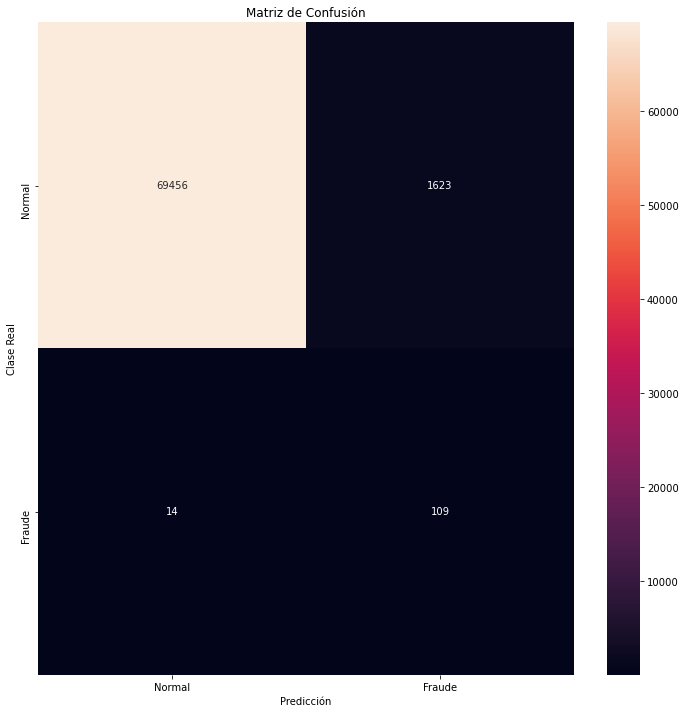

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202


Recall: 0.8861788617886179

ROC AUC: 0.9727740243679396


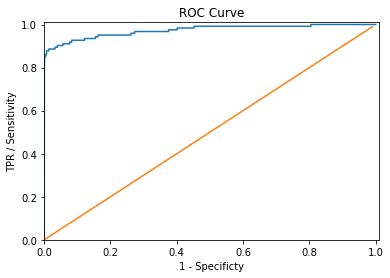

In [88]:
resume_ros = show_results('RandomOverSampler', model, X_test, y_test)


Pasamos de 369 muestras de fraudes a 213236. Además, obtuvimos un 0.89 de recall para la clase 2 (transacciones fraudulentas) y los Falsos positivos son 1623.

In [89]:
results = resume(results,resume_ros)

---
<a id="smotetomek"></a> 
#### 5.7.5. SMOTETomek. Regresión logística combinando resampling con Smote-Tomek.
[Ir a índice](#indice)


Ahora probaremos una técnica muy usada que consiste en aplicar en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset. En este caso usaremos SMOTE para oversampling: busca puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. Y usaremos Tomek para undersampling que quita los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de nuestras clases).

In [90]:
smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

print ("Distribución de los tipos de transacción antes del resampling {}".format(Counter(y_train)))
print ("Distribución de los tipos de transacción después del resampling {}".format(Counter(y_train_res)))

Distribución de los tipos de transacción antes del resampling Counter({0: 213236, 1: 369})
Distribución de los tipos de transacción después del resampling Counter({0: 213236, 1: 213236})


In [91]:
model = run_lr_model(X_train_res, X_test, y_train_res, y_test)

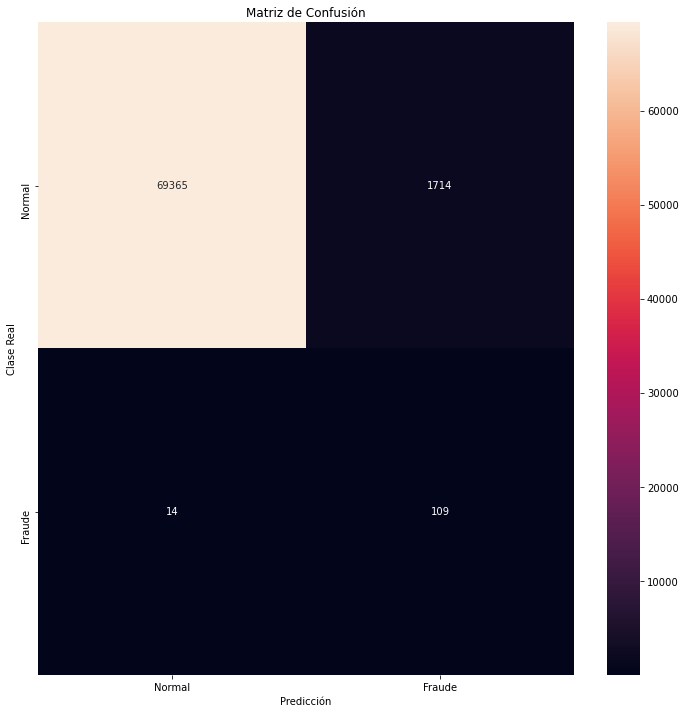

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202


Recall: 0.8861788617886179

ROC AUC: 0.9720242574476561


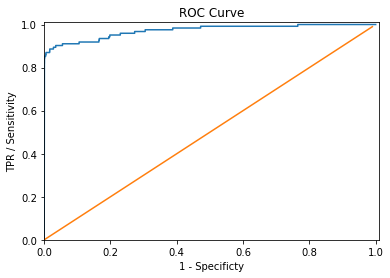

In [92]:
resume_smote = show_results('SMOTETomek', model, X_test, y_test)

In [93]:
results = resume(results,resume_smote)

<!-- En este caso seguimos teniendo bastante buen recall 0.85 de la clase 2 y vemos que los Falsos positivos de la clase 1 son bastante pocos, 325 (de 85295 muestras). -->

---
<a id="bbc"></a> 
#### 5.7.6. BalancedBaggingClassifier. Regresión logística con ensamble de modelos con balanceo.
[Ir a índice](#indice)

Usaremos un Clasificador de Ensamble que utiliza Bagging y el modelo será un DecisionTree.

In [94]:
#creamos un clasificador de árbol simple.
clftree = DecisionTreeClassifier()

In [95]:
#Con este clasificador simple, generamos el meta-modelo basado en la técnica de Bagging.
bbc = BalancedBaggingClassifier(base_estimator=clftree, n_estimators=1000,
                                bootstrap=True, n_jobs=-1,
                                random_state=42)

# entrenamos el modelo de Bagging.
model = bbc.fit(X_train, y_train)

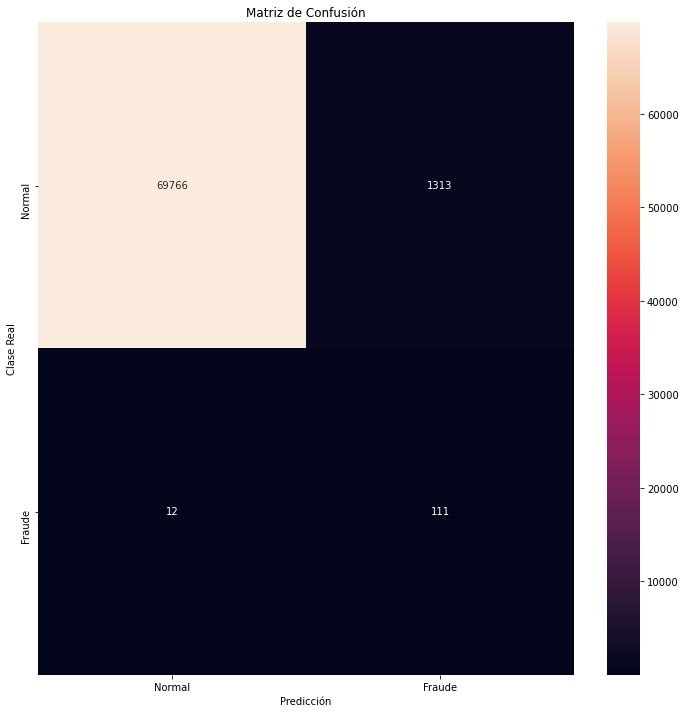

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.90      0.14       123

    accuracy                           0.98     71202
   macro avg       0.54      0.94      0.57     71202
weighted avg       1.00      0.98      0.99     71202


Recall: 0.9024390243902439

ROC AUC: 0.9757652569561613


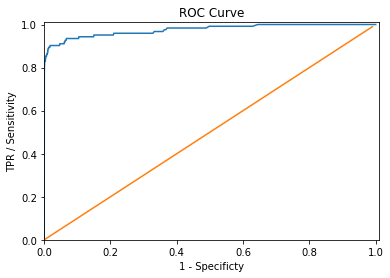

In [96]:
resume_bbc = show_results('BalancedBaggingClassifier', model, X_test, y_test)

Obtuvimos un recall de 0.89 para los casos de fraude.

In [97]:
results = resume(results,resume_bbc)

---
<a id="resultados_estrategias"></a> 
#### 5.8. Resultados de la aplicación de las estrategias para clases desbalanceadas.
[Ir a índice](#indice)

Mostramos el dataframe que fuimos armando, con un resumen de los resultados obtenidos para facilitar su comparación.

In [98]:
results

,Accuracy Score,Clasificador,Precision,ROC AUC,Recall,f1 Score
5,0.98,BalancedBaggingClassifier,0.08,0.98,0.90,0.14
0,0.98,RandomOverSampler,0.06,0.97,0.89,0.12
1,0.98,Penalized Linear Regression,0.06,0.97,0.89,0.12
2,0.98,SMOTETomek,0.06,0.97,0.89,0.11
3,1.00,Logistic Regression,0.84,0.96,0.62,0.71
4,0.38,NearMiss,0.00,0.80,0.93,0.01


Como podemos apreciar, con cualquiera de las técnicas que aplicamos mejoramos el modelo inicial de Regresión logística, siendo que en nuestro caso las estrategias de Penalización y Subsampling nos dieron el mejor resultado, cada una con un recall de 0.93.

---
<a id="svm"></a> 
#### 5.9. Support-vector machines, SVM
[Ir a índice](#indice)

In [99]:
model = SVC(probability = True)

In [100]:
model.fit(X_train, y_train)

SVC(probability=True)

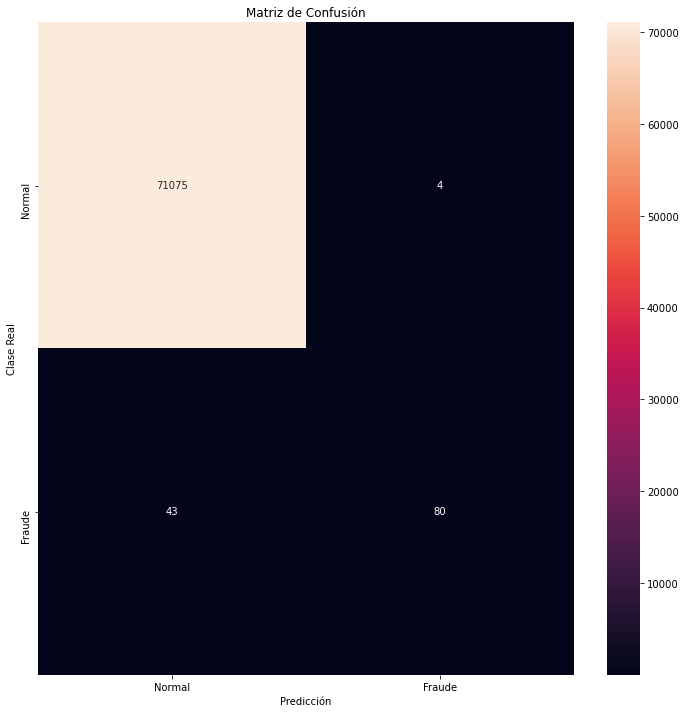

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.65      0.77       123

    accuracy                           1.00     71202
   macro avg       0.98      0.83      0.89     71202
weighted avg       1.00      1.00      1.00     71202


Recall: 0.6504065040650406

ROC AUC: 0.9536435869993276


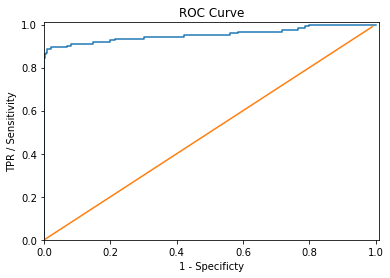

In [101]:
resume_svm_1 = show_results('Suppor Vector Machines 1', model, X_test, y_test)

In [102]:
results = resume(results,resume_svm_1)

In [105]:
model_2 = SVC(gamma=0.001, C=100, probability = True)

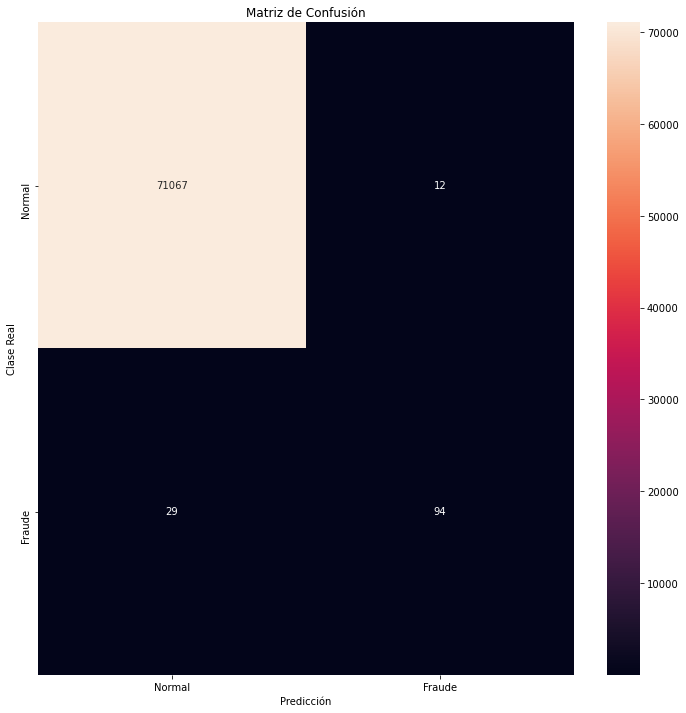

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.76      0.82       123

    accuracy                           1.00     71202
   macro avg       0.94      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202


Recall: 0.7642276422764228

ROC AUC: 0.938496865448121


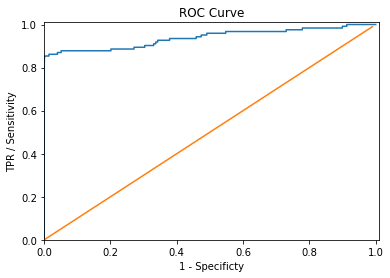

In [106]:
model_2.fit(X_train, y_train)
resume_svm_2 = show_results('Suppor Vector Machines 2', model_2, X_test, y_test)

In [107]:
results = resume(results,resume_svm_2)

---
<a id="random"></a> 
#### 5.10. Random Forest
[Ir a índice](#indice)

Algunos de los parámetros más importantes son los siguientes:

* `n_estimators`: el número de iteraciones (o sea, de `base_estimators`) para entrenar
* `criterion`: define el criterio de impureza para evaluar la calidad de las particiones (por defecto, es `gini`) 
* `max_features`: la cantidad de features que extraerá para entrenar cada `base_estimator`. Por default es igual a `sqrt(X.shape[1])`
* `bootstrap` y `bootstrap_features`: controla si tanto los n_samples como las features son extraidos con reposición.
* `max_depth`: la pronfundidad máxima del árbol
* `min_samples_leaf`: el número mínimo de n_samples para constituir una hoja del árbol (nodo terminal)
* `min_samples_split`: el número mínimo de n_samples para realizar un split.

y varios otros que pueden llegar a ser importantes al momento de realizar el tunning. En general, los más importantes suelen ser: `n_estimators`, `max_features`, `max_depth` y `min_samples_leaf`.

In [108]:
# Generaramos el meta-modelo basado en la técnica de Random Forest
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
#  entrenamos el modelo
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomForestClassifier(max_features='sqrt', verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


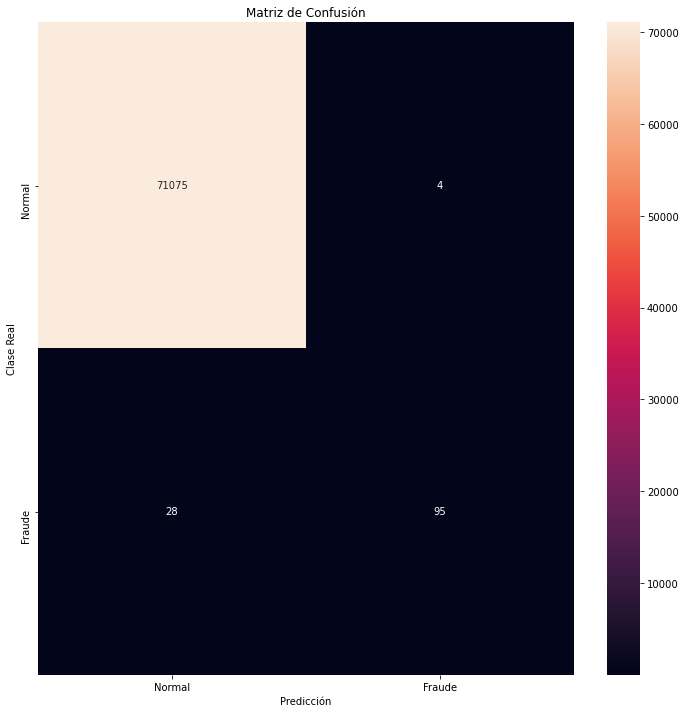

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.77      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202


Recall: 0.7723577235772358

ROC AUC: 0.9414488653813226


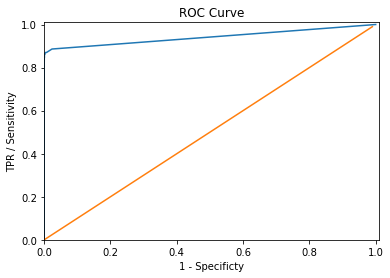

In [109]:
resume_rf_1 = show_results('RandomForestClassifier 1', model, X_test, y_test)

In [110]:
results = resume(results,resume_rf_1)

Probamos con otro bosque:

In [111]:
# otro modelo, variando hiperparámetros
model = RandomForestClassifier(n_estimators=100, class_weight="balanced",
                               max_features = 'sqrt', verbose=2, max_depth=6,
                               oob_score=True, random_state=50)
# a entrenar
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestClassifier(class_weight='balanced', max_depth=6,
                       max_features='sqrt', oob_score=True, random_state=50,
                       verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


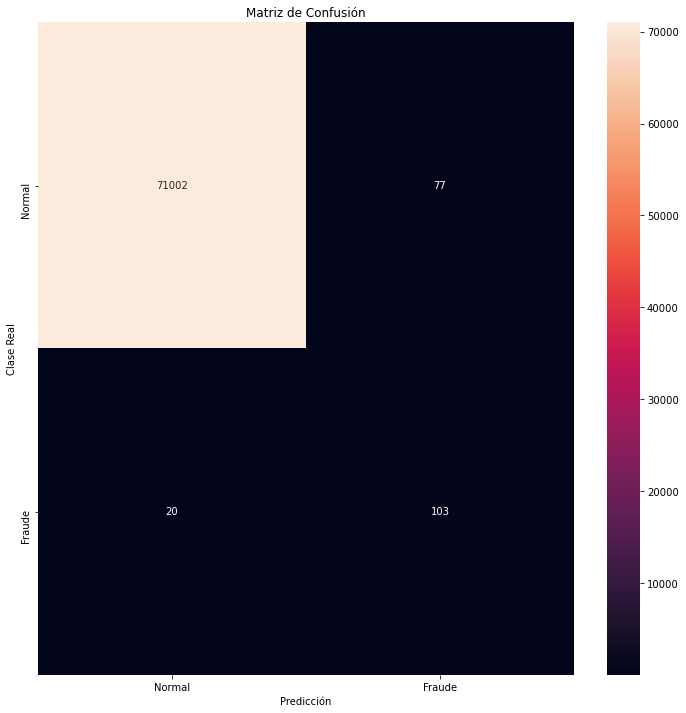

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.57      0.84      0.68       123

    accuracy                           1.00     71202
   macro avg       0.79      0.92      0.84     71202
weighted avg       1.00      1.00      1.00     71202


Recall: 0.8373983739837398

ROC AUC: 0.9789939443310358


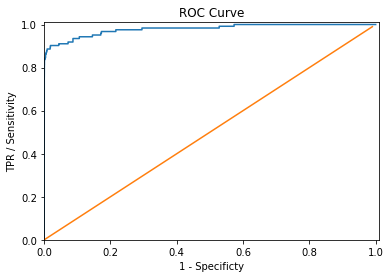

In [112]:
resume_rf_2 = show_results('RandomForestClassifier 2', model, X_test, y_test)

Veamos los resultados de ambos modelos:

In [113]:
results = resume(results,resume_rf_2)
results

,Accuracy Score,Clasificador,Precision,ROC AUC,Recall,f1 Score
9,1.00,RandomForestClassifier 2,0.57,0.98,0.84,0.68
0,0.98,BalancedBaggingClassifier,0.08,0.98,0.90,0.14
1,0.98,RandomOverSampler,0.06,0.97,0.89,0.12
2,0.98,Penalized Linear Regression,0.06,0.97,0.89,0.12
3,0.98,SMOTETomek,0.06,0.97,0.89,0.11
4,1.00,Logistic Regression,0.84,0.96,0.62,0.71
5,1.00,Suppor Vector Machines 1,0.95,0.95,0.65,0.77
6,1.00,RandomForestClassifier 1,0.96,0.94,0.77,0.86
7,1.00,Suppor Vector Machines 2,0.89,0.94,0.76,0.82
8,0.38,NearMiss,0.00,0.80,0.93,0.01


---
<a id="naive_bayes"></a> 
### 5.11. Naive Bayes.
[Ir a índice](#indice)

In [114]:
gnb = GaussianNB()

In [115]:
model_gnb, y_pred_gnb, y_pred_prob_gnb, train_pred_gnb = predict_estimator(gnb, X_test, X_train, y_train)

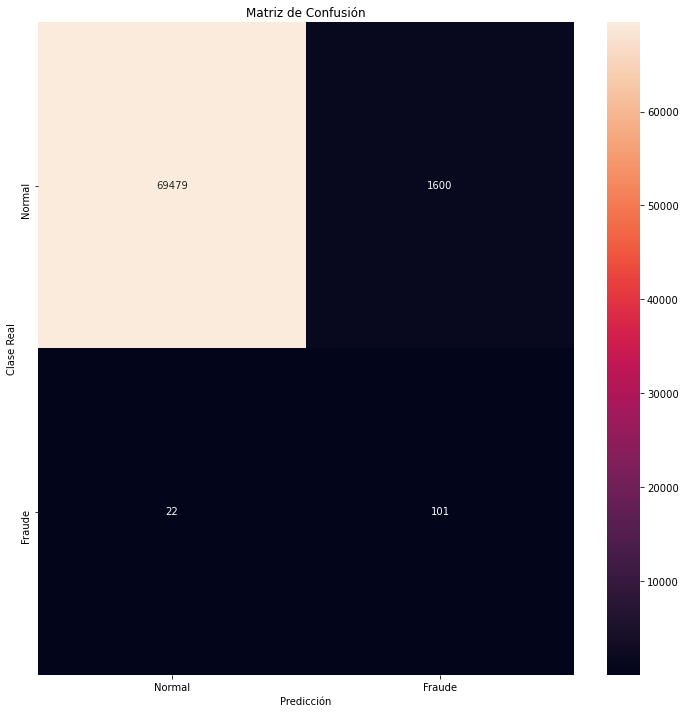

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.82      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.90      0.55     71202
weighted avg       1.00      0.98      0.99     71202


Recall: 0.8211382113821138

ROC AUC: 0.957302003484729


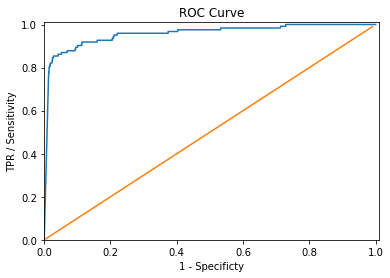

In [116]:
resume_gnb = show_results('GaussianNB', model_gnb, X_test, y_test)

In [117]:
results = resume(results,resume_gnb)

In [118]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test))) 

Precisión en el set de Entrenamiento: 0.98
Precisión en el set de Test: 0.98


In [119]:
# Print Test results
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          X_test.shape[0],
          (y_test != y_pred_gnb).sum()
))

Total de Muestras en Test: 71202
Fallos: 1622


---
<a id="fin"></a> 
## 6. Resultados finales.
[Ir a índice](#indice)


Los outcomes o resultados en una clasificación se pueden dividir en cuatro clases:
- **Falsos positivos (FP):** es una clase negativa que fue clasificada como positiva. TEn nuestro caso de análisis, en el cual nuestra clase positiva es predecir si una transacción es Fraudulenta, **FP** sería predecir que va a ser fraudulenta, pero resulta que es una transacción normal. 
- **Falsos negativas (FN):** es una clase positiva que fue clasificada como negativa. En nuestro ejemplo, un **FN** sería predecir que la transacción es normal y que luego sea fraudulenta. 
- **Verdaderos positivos (TP):** es una clase positiva clasificada correctamente. En nuestro caso, sería predecir que una transacción es fraudulenta, y luego realmente lo sea. 
- **Verdaderos negativos (TN):** es una clase negativa clasificada correctamente. En nuestro caso, sería predecir que una transacción no sea fraudulenta, y luego realmente es una transacción normal. 


Éstos pueden verse de forma clara en la Matriz de confusión.

La **Matriz de confusión** es una tabla de doble entrada donde se describen los **resultados observados** **vs. resultados predichos** (las predicciones que hicimos sobre las transacciones a partir de nuestro modelo). 

Nos permite discernir entre los casos **bien clasificados** y aquellos que fueron **erróneamente clasificados** por el modelo.

A partir de la **Matriz de confusión** podemos construir las **outcomes** de la clasificación (**TP**, **TN**, **FP**, y **FN**).

<img src="img/03_confusion_matriz.png" alt="Drawing" style="width: 500px;"/>



Además, a partir de la **Matriz de confusión** podemos derivar las **distintas métricas** que nos vas a permitir evaluar los modelos de clasificación (siendo que cada una de ellas hace foco en distintos cuadrantes de la matriz de confusión): accuracy, precision, recall sensitivity, specificity, F1 score.

* **Accuracy**: proporción de casos correctamente clasificados de los datos de test sobre el total de casos de test (TP + TN / P + N) ( es como decir "N% (aprox.) de los casos —en el test set han sido correctamente clasificados..").

##### En los problemas de **clases desbalanceadas**, como es típico en la temática en la cual estamos intentando aplicar los modelos, el **accuracy** suele ser alto porque esta métrica hace foco tanto en la detección correcta de **TN** como de **TP**. Pero nuestro problema de negocio requiere que nos concentremos más en la detección de los **TP** y no de los **TN**.

* **Error de Clasificación**: Es, básicamente, el complemento del accuracy. Cuantifica el error total comentido por el clasificador. No tenemos un constructor de sklearn, sino que lo podemos estimar "a mano" (1 - accuracy_score)

* **Sensitivity o recall o true positive rate (TPR)**: mide la capacidad (qué tan "sensible" es) del modelo de detectar los verdaderos positivos (TP) sobre todos los casos que son positivos (FN+TP o todos los positivos). En nuestro ejemplo, del total de transacciones fraudulentas, sería evaluar cuántas logra identificar correctamente el modelo (TP / P).

##### ¿Cómo se interpreta? Según "x" recall_score, podríamos pensar que de cada 100 transacciones fraudulentas, nuestro modelo detectará "x" como fraudulentas y el resto las clasificará como transacciones normales.

##### Comparado con el accuracy_score, esta medida nos da una mejor idea de cómo está funcionando nuestro modelo en relación al interés de nuestro negocio, y no va a estar afectada por los problemas de desbalanceo de clases.

* **Specificity** o **true negative rate (TNR)** mide la capacidad de detectar los **"verdaderos negativos (TN)** sobre el total de casos que son negativos **(TN+FP)**. Es decir, nos da información sobre qué tan específico o selectivo es el modelo al predecir las instancias positivas ( TN / (TN + FP)).

##### Mientras más se acerque a 1 elr esultado, nuesto modelo es muy específico, es decir que cometió pocos errores de falsos positivos.**Specificity** o **TNR** puede ser importante, cuando queremos evitar cometer errores y que nuestro modelo sea muy **específico**. PERO hay que tener en cuenta que priorizar modelos con <b>mayor especificidad</b>, puede generar <b>una pérdida en la sensibilidad</b>.

* **Precision** o **positive predictive value (PPV)** mide qué tan **"preciso"** es el clasificador al predecir las instancias positivas. Es decir, cuando el clasificador predice un valor positivo..., ¿qué tan frecuentemente es correcta esta predicción? Se calcula como el número de **predicciones correctas** sobre el **número total de predicciones** y nos permite evaluar el peso de los **Falsos Positivos (FP)**

##### Aunque parecen lo mismo, especificidad y pecisión son muy distintos. Aunque en ambos están pesando los falsos positivos (FP),en la especificidad evaluamos los errores que cometemos en relación a los TN, mientras que con la precisión evaluamos cuán precisos somos cada vez que decimos que una transacción es fraudulenta, con lo que estamos evaluando los errores en relación al TP.

##### Dependiendo del problema de negocio que estemos evaluando, quizás nuestro objetivo sea tener una precisión muy alta. Es decir, que de cada 100 predicciones positivas, la mayoría sean verdaderas y cometamos un bajo porcentaje de falsos positivos (FP).

* **False positive rate (FPR)**: se calcula como el número de clases incorrectas predichas, sobre el total de clases negativas. El mejor **FPR** es 0, mientras que el peor es 1. Se calcula como 1-specificity.

##### Este valor es el complemento de la especificidad, así que su interpretación es también el complemento. En este caso nos está indicand cuántos errores cometió de falsos positivos (es decir que pocas veces dijo que una transacción era fraudulenta, cuando en realidad era una transacción normal).

* **F1-Score**: Es un promedio armónico entre precision y recall. En caso de obtener un bajo valor de `f1_score`, porque tanto el recall como la precision tienen valores bajos, implica que nuestro modelo ni es bueno identificando las clases positivas, ni tampoco es preciso haciéndolo.

* **Curva ROC**: es un plot que nos permite evaluar en un modelo la relación entre dos métricas que vimos anteriormente: **specificity** (que también se calcula como $1-FPR$, tasa de falsos negativos) y **sensitivity** (o también denominada **recall** o $TPR$, tasa de verdaderos positivos). Nos permite estimarel **Area bajo la curva (AUC por sus siglas en inglés, Area under the curve)**. El **AUC** intenta resumir en una sóla métrica la relación que muestra el gráfico entre **sensitivity** y **specificity** y así poder comparar modelos utilizando esa métrica:

In [120]:
#Mostramos el dataframe con todos los resultados.
results

,Accuracy Score,Clasificador,Precision,ROC AUC,Recall,f1 Score
0,1.00,RandomForestClassifier 2,0.57,0.98,0.84,0.68
1,0.98,BalancedBaggingClassifier,0.08,0.98,0.90,0.14
2,0.98,RandomOverSampler,0.06,0.97,0.89,0.12
3,0.98,Penalized Linear Regression,0.06,0.97,0.89,0.12
4,0.98,SMOTETomek,0.06,0.97,0.89,0.11
5,1.00,Logistic Regression,0.84,0.96,0.62,0.71
10,0.98,GaussianNB,0.06,0.96,0.82,0.11
6,1.00,Suppor Vector Machines 1,0.95,0.95,0.65,0.77
7,1.00,RandomForestClassifier 1,0.96,0.94,0.77,0.86
8,1.00,Suppor Vector Machines 2,0.89,0.94,0.76,0.82


---
<a id="conclusiones"></a> 
## 7. Conclusiones.
[Ir a índice](#indice)
